In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#some lines in the csv had an extra whitespace at the end, throwing an error when called pd.read_csv
#hence, some preprocessing is needed to remove the whitespaces at the end and write to a new csv
with open(r'D:\Pradyumn Vikram\Projects\ml_camp_sel\LatticePhysics\raw.csv', 'r') as f, open(r'D:\Pradyumn Vikram\Projects\ml_camp_sel\LatticePhysics\raw_clean.csv', 'w') as fr:
    for line in f:
        fr.write(line.rstrip()+'\n')

In [2]:
#reading the csv file, there is no header and we are delimited by a whitespace
#we have 39+2 features + targets however we dont know which is which
df = pd.read_csv(r'D:\Pradyumn Vikram\Projects\ml_camp_sel\LatticePhysics\raw_clean.csv', header=None, sep=' ')
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,1.325139,1.883559,2.855694,2.859994,2.857451,2.867554,2.848997,2.840123,2.867360,2.850948,...,2.846118,2.846239,2.839146,2.838850,2.846678,2.845871,2.838678,2.844885,2.851978,2.851249
std,0.017798,0.120018,1.240040,1.238304,1.237204,1.234584,1.243988,1.242275,1.242041,1.243739,...,1.242851,1.244249,1.242941,1.239665,1.243829,1.239855,1.245019,1.243721,1.237966,1.246842
min,1.246360,1.527497,0.700055,0.700098,0.700080,0.700019,0.700079,0.700042,0.700169,0.700152,...,0.700021,0.700129,0.700026,0.700084,0.700008,0.700254,0.700188,0.700112,0.700101,0.700251
25%,1.313650,1.798641,1.778343,1.784898,1.785185,1.805416,1.767307,1.763301,1.784607,1.768854,...,1.769069,1.759647,1.762613,1.772523,1.769221,1.780978,1.747693,1.776082,1.775471,1.765346
50%,1.326085,1.876336,2.855621,2.869736,2.873263,2.875835,2.844372,2.841756,2.885330,2.852607,...,2.838541,2.845264,2.828400,2.819288,2.848433,2.832606,2.842550,2.837816,2.855193,2.848884
75%,1.337683,1.960852,3.935998,3.931073,3.921500,3.939858,3.918052,3.918678,3.938584,3.927791,...,3.927562,3.923765,3.921124,3.908517,3.931616,3.909285,3.917983,3.918358,3.916448,3.932423
max,1.385580,2.473015,4.999537,4.999781,4.999613,4.999984,4.999956,4.999745,4.999930,4.999936,...,4.999780,4.999927,4.999774,4.999744,4.999910,4.999665,4.999367,4.999866,4.999340,4.999952


In [3]:
#since we have no header we can call the columns by index 0-40
#based on some research on the data, it is of the following form
#we are given a NFAC reactor(aka a device) which has pins in which U-238 doped with U-235 can be input
#we are modelling on only 1/8th of the device for easier computation giving us 39 input PINS to work with
#the amount of U-235 in the U-238 for each pin (by mass percentae between 0.7%-5%) are our feature vectors
#for each configuration of the pins we can find a corresponding PPPF and k-INF value
#I have chosen the Mean Squared Error and R2 value as my evaluation metric
#since we need to predict values as close to true values as possible
#and we need features which describe the changes in data well
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.32630,1.862086,3.562615,1.112359,4.208065,1.412679,2.271031,3.950614,3.627032,4.600332,...,3.965987,4.030999,0.826347,2.088521,4.088550,1.184149,2.780985,2.865400,4.773820,3.539373
1,1.34149,1.786558,2.354766,1.047929,2.268974,4.637777,3.793194,2.859702,4.361058,3.592485,...,2.228000,4.837370,2.846538,3.413201,4.154079,4.700800,3.597879,4.681148,3.215494,3.972672
2,1.33034,1.826187,3.037997,4.719517,1.502280,3.644736,3.575727,1.337686,2.380347,4.503771,...,2.615278,3.757999,3.161658,4.996056,3.339642,2.548468,4.417111,1.375554,4.363320,2.988546
3,1.35653,1.739225,4.412804,2.220680,3.132738,1.327124,4.759890,2.882082,3.663430,4.531524,...,3.899026,1.018926,4.379308,3.280298,3.916281,3.179922,3.769315,0.849544,2.508179,0.912272
4,1.30190,1.955829,2.790669,0.798177,1.231750,1.977844,2.393930,4.738126,1.364743,3.391665,...,3.641512,1.564076,2.178406,2.754888,4.007165,0.702069,4.064682,1.370575,0.769475,1.395959


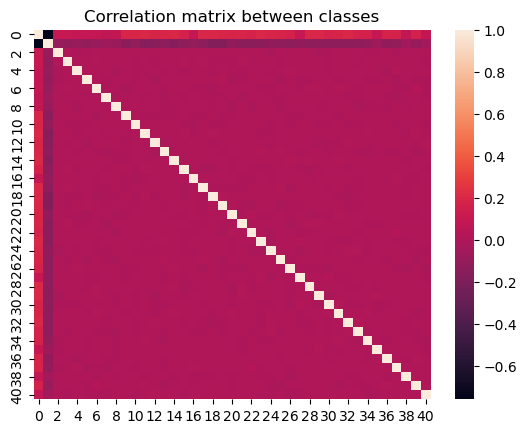

In [5]:
#the first step will be to identify the feature and target columns
#since the amount of U-235 in each pin can be controlled independantly 
#amount in one pin does not affect the other however it should affect the target vectors
#much more significantly

#we now try to find the dependance of each column with the other

#we dont know if the relationship of each fuel enrichment is linear or non-linear wrt the target variables

#we view the correlation matrix first to check for any linear dependancy
#the idea is since all pins are independant of each other but the targets are dependant on all pins
#if we are able to find dependance of each column with every other we should get 2 columns dependance on every other
#and rest all independance of each other
import seaborn as sb

sb.heatmap(df.corr())
plt.title("Correlation matrix between classes")
plt.show()

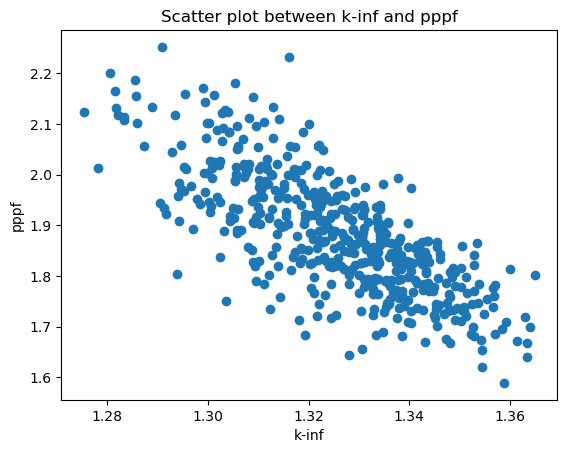

In [9]:
#the above heatmap gives me a qualitative idea that columns 0 and 1 are comparatively more related
#with the other other columns, which are all independant of each other (correlation is almost 0)
#column 1 has a more negative correlation -> implying negative dependancy (inversely proportional to pin inputs)
#column 0 has a more positive corr -> implying a positive dependancy (directly proportional)
#hence it is safe to assume our targets features are in columns 0 and 1
#note that columns 0 and 1 themselves are very negatively correlated with each other

#! I used chatgpt to understand what low/high k-inf and pppf mean and how they relate to each other
#! for the purposes of making better sense of the data

#high k-inf implies -> more neutrons are available for fission
#low pppf implies -> the hottest pin is not that hot, minimising damage
#k-inf and pppf shows that they CAN be inversely related as reactor designs aim to maximise k-inf and minimize pppf
#but over time as neutrons get used up we end up with a low k-inf and a high pppf
#if the reactor is driven with a large influence of fuel enrichment(which is what we are doing here) then they are usually heavily
#related as evidenced by our data :)

plt.scatter(df[0][:500], df[1][:500])
plt.title("Scatter plot between k-inf and pppf")
plt.xlabel("k-inf")
plt.ylabel("pppf")
plt.show()

In [11]:
#even though we got correlations of the 0 and 1 columns with others
#the correlation value itself implies a linear dependance
#we also plot the mutual information matrix to check if we have a stronger non linear dependancy

from sklearn.feature_selection import mutual_info_regression
mi_matrix = [[mutual_info_regression(df[[i]], df[j]) for j in range(len(df.columns))] for i in range(len(df.columns))]

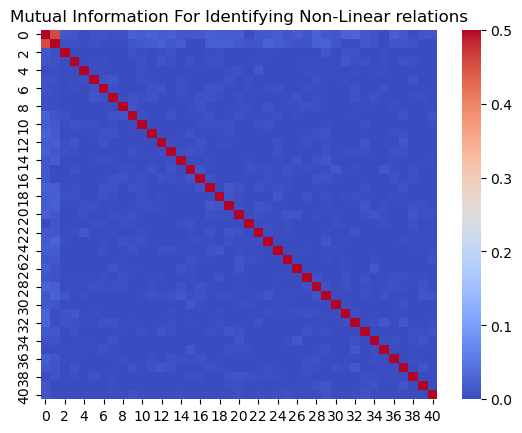

In [12]:
#we can see that even though the columns 0 and 1 have mi slightly higher than others but not significant
#leading us to assume a linear dependance

mi_matrix_heatmap = [[mi_matrix[i][j][0] if i!=j else 0.5 for j in range(len(df.columns))] for i in range(len(df.columns))]
#I used 0.5 for the diagonal values as MI of 2 same columns will always give 1 however the other values were less than 0.5 and 1 so
#i set the diagonal elements as 0.5 to enable a clearer view of the non diagonal elements

sb.heatmap(mi_matrix_heatmap, cmap='coolwarm')
plt.title("Mutual Information For Identifying Non-Linear relations")
plt.show()

In [13]:
#cleaning and importing the testing data to evaluate the model with different metrics

In [15]:
with open(r'D:\Pradyumn Vikram\Projects\ml_camp_sel\LatticePhysics\test.csv', 'r') as f, open(r'D:\Pradyumn Vikram\Projects\ml_camp_sel\LatticePhysics\test_clean.csv', 'w') as fr:
    for line in f:
        fr.write(line.rstrip()+'\n')

In [16]:
df_test = pd.read_csv(r'D:\Pradyumn Vikram\Projects\ml_camp_sel\LatticePhysics\test_clean.csv', sep=' ', header=None)
df_test_design_mat = df_test.drop([0,1], axis=1)
df_test_design_mat.describe()

,2,3,4,5,6,7,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,...,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,2.701260,2.967494,3.014159,2.795385,2.965621,2.796634,2.831058,2.726521,2.932391,2.927911,...,2.908058,2.821566,2.823574,2.785493,2.767362,2.794085,2.807292,2.978492,2.869162,2.858995
std,1.284292,1.284944,1.232559,1.256025,1.266371,1.202473,1.219239,1.262726,1.257062,1.295604,...,1.214718,1.197578,1.229830,1.262918,1.231848,1.228890,1.246010,1.220004,1.249595,1.209504
min,0.704500,0.721365,0.715529,0.731264,0.720880,0.723688,0.703294,0.701629,0.722356,0.702267,...,0.702618,0.708473,0.703969,0.707563,0.708109,0.700969,0.702549,0.767596,0.701079,0.712739
25%,1.507795,1.878954,1.931571,1.661779,1.846509,1.801661,1.776287,1.544621,1.849839,1.679643,...,1.845470,1.855683,1.781074,1.715149,1.682263,1.783035,1.683585,1.969653,1.826088,1.851503
50%,2.601947,2.963542,3.142855,2.717394,2.928474,2.806415,2.877927,2.716589,2.923397,2.990801,...,2.907050,2.871422,2.834925,2.691857,2.717363,2.771674,2.705562,3.037320,2.849220,2.863559
75%,3.893838,4.201317,4.084776,3.878291,4.125533,3.860910,3.826871,3.866917,4.066372,4.096780,...,3.915200,3.726001,3.865245,3.956112,3.844797,3.776602,3.888194,4.059550,3.940651,3.847117
max,4.985554,4.993191,4.994649,4.979287,4.997321,4.969919,4.988904,4.956664,4.998368,4.987738,...,4.993791,4.973257,4.998283,4.973217,4.999399,4.992264,4.990015,4.982193,4.997213,4.962904


In [17]:
#matrix with only the feature vectors
design_matrix = df.drop([0,1],axis=1)

In [18]:
#Beginning of model training and evaluation

In [19]:
#we first explore a linear regression model for predicting k-inf since we had hunches
#of linear relations above
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

clf = LinearRegression() 
  
clf.fit(design_matrix, df[0]) 
print(clf.score(df_test_design_mat, df_test[0]))

0.9871615830972511


In [11]:
#we get a mean squared error ~ 4e-6 which is very less and a good sign
mean_squared_error(clf.predict(df_test_design_mat), df_test[0])

4.861067376457189e-06

In [17]:
#We have achieved a pretty good score of 98%, indicating our inferences so far have been accurate
#however since the two target classes were inversely dependant -> linear models should not fit the data for
#class 1 ie pppf
#Now we train a linear regression model for our 1st column target as well

clf = LinearRegression() 
  
clf.fit(design_matrix, df[1]) 
print(clf.score(df_test_design_mat, df_test[1]))

0.6058309763768666


In [20]:
#as expected, we have achieved only a 60% this time which means this relation might not be linear as indicated by
#the fact our target 0 and target 1 are inversely proportional eliminating the the linearity
#we use a support vector regressor to incorporate for the same
#we tune the hyperparameters using grid search


#we try to find the mean deviation and the mean
#and compute the dependancies on the pppf column, since pppf is dependant on how uniform the values in
#each pin are and the overall estimated value of the fuel enrichments

standard_deviation = design_matrix.std(axis=1)
mean = design_matrix.mean(axis=1)

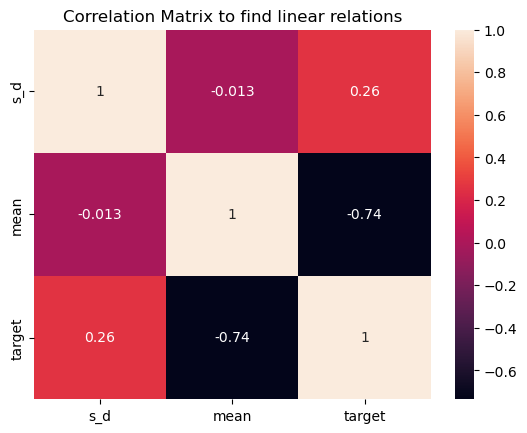

In [21]:
sb.heatmap(pd.DataFrame({"s_d":standard_deviation, "mean":mean, "target":df[1]}).corr(), annot=True)
plt.title("Correlation Matrix to find linear relations")
plt.show()
#we see a strong negative correlation of the target class with the mean class
#this can be because higher fuel enrichment increases neutron absorption
#this leads to a flatter neutron flux profile
#which results in lower pppf
#the correlation of the target with the mean vector is actually significantly more than the
#individual rows, however not so much with the standard deviation

In [69]:
#adding the mean and k-inf vectors as input features for training

design_matrix[41] = mean

df_test_design_mat[41] = df_test_design_mat.mean(axis=1)

In [87]:
design_matrix[42] = df[0]
df_test_design_mat[42] = df_test[0]

In [88]:
#we add the mean and k-inf values to our deisgn matrix since they both had a strong correlation to the pppf values as found earlier
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 

grid.fit(design_matrix, df[1])

print(grid.best_params_)
print(grid.score(df_test_design_mat, df_test[1]))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.680 total time=   4.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.674 total time=   4.4s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.678 total time=   4.5s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.668 total time=   4.5s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.679 total time=   4.5s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.612 total time=   5.1s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.614 total time=   5.2s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.615 total time=   5.2s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.606 total time=   5.2s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.622 total time=   5.1s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.521 total time=   6.3s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;

In [89]:
predictions = grid.predict(df_test_design_mat)
mean_squared_error(df_test[1], predictions)

0.004167042359292613

In [ ]:
#we see that with the addition of the mean vector to our design matrix, we did not got a very small bump in our score
#The mean squared error is very low ~ 0.004 making it a decent fit for pppf values


'''
In summary, we analysed and concluded the target vectors are column 0 for k-inf which has a linear relation with the fuel enrichment values
and column 0 for pppf which has a inverse relation to the k-inf values and the mean of the fuel enrichment, we fit a linear regression
model for predicting k-inf with a 98% score, whereas for pppf we had to use a non-linear classifier to fit the data giving a 72.5% score
with a 0.004 mse. We can conclude that k-inf values are linearly dependant on fuel enrichment -> as more neutrons imply more atoms for fission
and the pppf values are non-linearly related to the pin values measured overall(using the mean in this case) as the higher fuel enrichment
implies a flatter neutron flux profile implying a more uniform distribution of neutrons which imlpies less pppf.
'''